# Práctica: Qubits y teleportación cuántica

In [1]:
!pip install qiskit[visualization]

In [2]:
import qiskit as qk

# Circuito de un qubit

In [3]:
circuito = qk.QuantumCircuit(1)

Podemos pintar el circuito en cualquier momento.

In [4]:
circuito.draw()

q_0:

In [5]:
qk.QuantumCircuit(2).draw()

q_0: 
     
q_1:

Inicializamos un estado

In [6]:
from qiskit.quantum_info import Statevector

estado = Statevector.from_label('0')
estado

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


O también

In [7]:
estado.data

array([1.+0.j, 0.+0.j])

Podemos evolucionar el estado a través del circuito

In [8]:
estado_evol = estado.evolve(circuito)

Y observamos el resultado

In [9]:
estado_evol

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Podemos medir la projección del estado sobre otro (producto escalar).

In [10]:
from qiskit.quantum_info import state_fidelity

state_fidelity(estado, estado_evol)

1.0

Podemos pintarlos

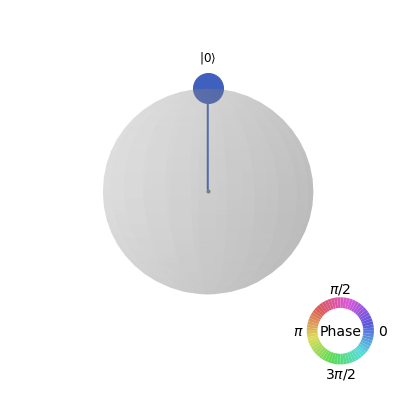

In [11]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(estado.data)

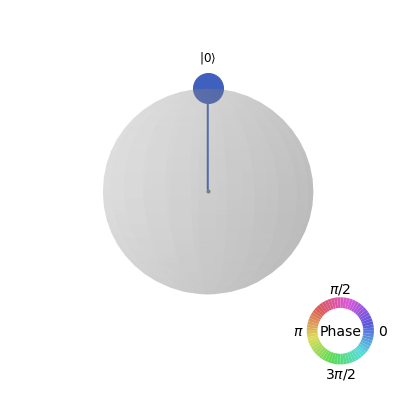

In [12]:
plot_state_qsphere(estado_evol.data)

Podemos ir añadiendo puertas al circuito

In [13]:
circuito = qk.QuantumCircuit(1)
circuito.x(0)

circuito.draw()

┌───┐
q_0: ┤ X ├
     └───┘

In [14]:
circuito.draw('text')

┌───┐
q_0: ┤ X ├
     └───┘

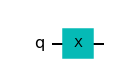

In [15]:
circuito.draw('mpl')

In [16]:
circuito.draw('latex_source')

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{X}} & \\qw & \\qw\\\\ \n\\\\ }}\n\\end{document}'

Ahora evolucionamos el estado anterior en el nuevo circuito

In [17]:
estado = Statevector.from_label('0')
estado_evol = estado.evolve(circuito)
estado_evol

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Si projectamos este vector sobre el inicial obtenemos

In [18]:
state_fidelity(estado, estado_evol)

0.0

Los estados son ortogonales.

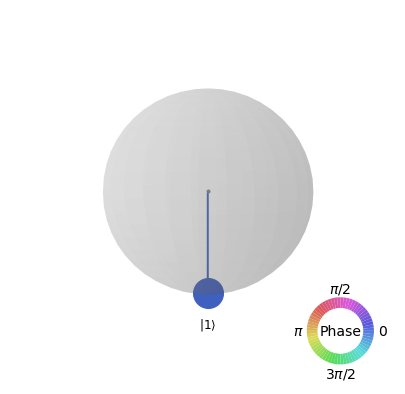

In [19]:
plot_state_qsphere(estado_evol.data)

Podemos crear una superposición de estados

In [20]:
estado = Statevector.from_label('0')
circuito = qk.QuantumCircuit(1)
circuito.h(0)
circuito.draw()

┌───┐
q_0: ┤ H ├
     └───┘

In [21]:
estado_evol = estado.evolve(circuito)
estado_evol

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


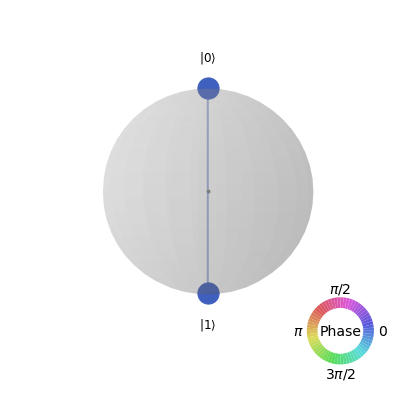

In [22]:
plot_state_qsphere(estado_evol.data)

Podemos visualizar las fases de los estados.

In [114]:
estado = Statevector.from_label('0')
circuito = qk.QuantumCircuit(1)
circuito.h(0)
circuito.z(0)
circuito.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘

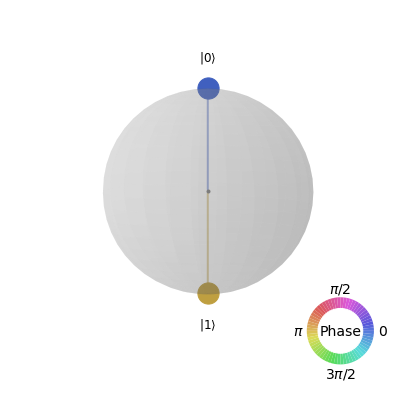

In [115]:
estado_evol = estado.evolve(circuito)
plot_state_qsphere(estado_evol.data)

El color indica la fase de esa componente.

In [116]:
estado = Statevector.from_label('0')
circuito = qk.QuantumCircuit(1)
circuito.h(0)
circuito.s(0)
circuito.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ S ├
     └───┘└───┘

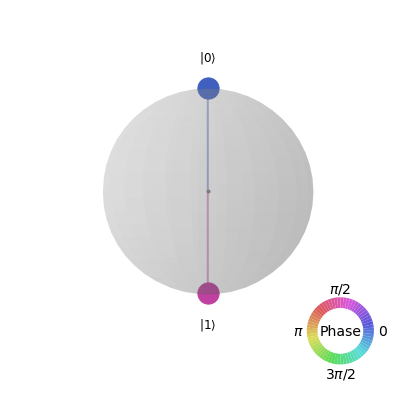

In [117]:
estado_evol = estado.evolve(circuito)
plot_state_qsphere(estado_evol.data)

In [118]:
estado = Statevector.from_label('0')
circuito = qk.QuantumCircuit(1)
circuito.h(0)
circuito.t(0)
circuito.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ T ├
     └───┘└───┘

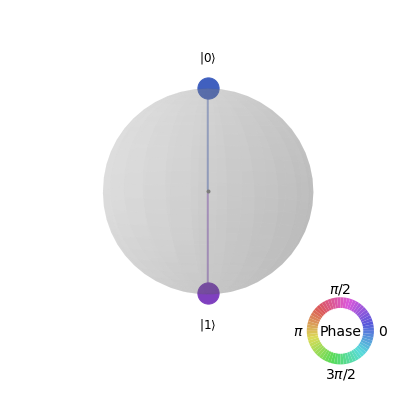

In [119]:
estado_evol = estado.evolve(circuito)
plot_state_qsphere(estado_evol.data)

In [120]:
estado = Statevector.from_label('0')
circuito = qk.QuantumCircuit(1)
circuito.h(0)
circuito.z(0)
circuito.s(0)
circuito.draw()

┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ Z ├┤ S ├
     └───┘└───┘└───┘

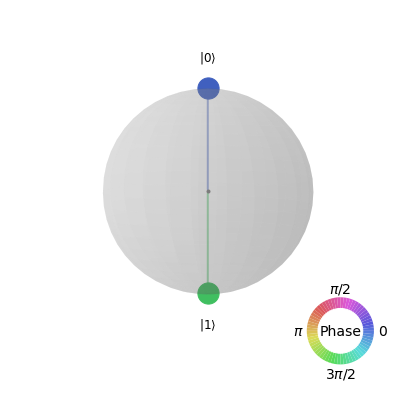

In [121]:
estado_evol = estado.evolve(circuito)
plot_state_qsphere(estado_evol.data)

# Circuito de muchos qubits

Podemos crear el cosntructor de estados de Bell

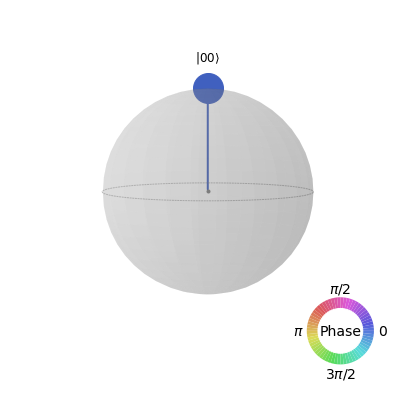

In [122]:
estado = Statevector.from_label('00')
plot_state_qsphere(estado.data)

In [123]:
circuito = qk.QuantumCircuit(2)
circuito.h(0)
circuito.cx(0, 1)
circuito.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Observamos el resultado

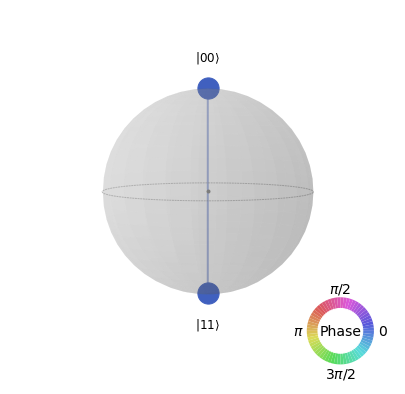

In [124]:
estado_evol = estado.evolve(circuito)
plot_state_qsphere(estado_evol.data)

Podemos medir los estados

In [125]:
bins = estado_evol.sample_counts(shots=1024)
bins

{'00': 493, '11': 531}

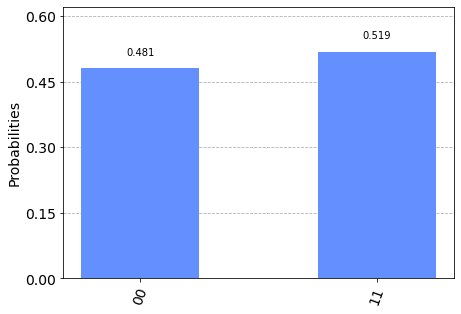

In [126]:
from qiskit.visualization import plot_histogram
plot_histogram(bins)

### Ejercicio 1

Crear todos los estado de la base de Bell a partir del constructor de la base

# Medidas

Podemos insertar medidas en nuestro circuito

In [127]:
circuito = qk.QuantumCircuit(2, 2) # Primer argumento -> # de quibtis, Segundo argumento -> # de bits
circuito.h(0)
circuito.cx(0,1)
circuito.measure([0,1], [0,1]) # Primer argumento -> qubits que medimos, Segundo argumento -> Bits donde guardaremos el resultado de las medidas
circuito.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Podemos simular el circuito con un backend

In [128]:
simulador = qk.Aer.get_backend('qasm_simulator')
simulador.configuration().to_dict()

{'backend_name': 'qasm_simulator',
 'backend_version': '0.9.1',
 'basis_gates': ['ccx',
  'cp',
  'cswap',
  'csx',
  'cu',
  'cu1',
  'cu2',
  'cu3',
  'cx',
  'cy',
  'cz',
  'delay',
  'diagonal',
  'h',
  'id',
  'initialize',
  'mcp',
  'mcphase',
  'mcr',
  'mcrx',
  'mcry',
  'mcrz',
  'mcswap',
  'mcsx',
  'mcu',
  'mcu1',
  'mcu2',
  'mcu3',
  'mcx',
  'mcx_gray',
  'mcy',
  'mcz',
  'multiplexer',
  'p',
  'pauli',
  'r',
  'rx',
  'rxx',
  'ry',
  'ryy',
  'rz',
  'rzx',
  'rzz',
  's',
  'sdg',
  'swap',
  'sx',
  'sxdg',
  't',
  'tdg',
  'u',
  'u1',
  'u2',
  'u3',
  'unitary',
  'x',
  'y',
  'z',
  'kraus',
  'roerror',
  'save_amplitudes',
  'save_amplitudes_sq',
  'save_density_matrix',
  'save_expval',
  'save_expval_var',
  'save_probabilities',
  'save_probabilities_dict',
  'save_stabilizer',
  'save_state',
  'save_statevector',
  'save_statevector_dict',
  'set_density_matrix',
  'set_stabilizer',
  'set_statevector',
  'snapshot'],
 'conditional': True,
 'coup

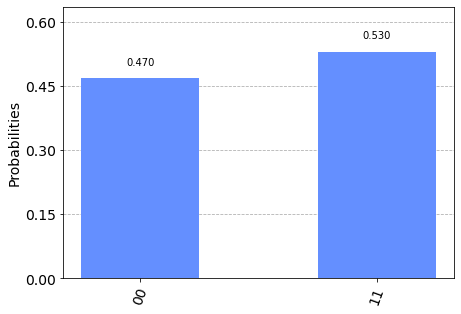

In [129]:
resultado = qk.execute(circuito, simulador, shots=1024).result()
counts = resultado.get_counts(circuito)
plot_histogram(counts)

# Teleportación Cuántica

### ¿Qué estado vamos a teleportar?

Nos inventamos uno. Podemos inicializar el circuito de esta forma

In [130]:
import qiskit as qk
import numpy as np

In [131]:
Alice_1 = qk.QuantumRegister(1)
Alice_2 = qk.QuantumRegister(1)
Bob = qk.QuantumRegister(1)
Alice_bits = qk.ClassicalRegister(2)
Bob_bit = qk.ClassicalRegister(1)
circuito = qk.QuantumCircuit(Alice_1, Alice_2, Bob, Alice_bits, Bob_bit)

In [132]:
circuito.draw()

q83_0: 
       
q84_0: 
       
q85_0: 
       
c10: 2/
       
c11: 1/

In [133]:
circuito.initialize([np.sqrt(0.9), np.sqrt(0.1)], Alice_1)
circuito.draw()

┌─────────────────────────────┐
q83_0: ┤ Initialize(0.94868,0.31623) ├
       └─────────────────────────────┘
q84_0: ───────────────────────────────
                                      
q85_0: ───────────────────────────────
                                      
c10: 2/═══════════════════════════════
                                      
c11: 1/═══════════════════════════════

Creamos entrelazamiento entre el qubiit de Alice y de Bob

In [134]:
circuito.h(Alice_2)
circuito.cx(Alice_2, Bob)
circuito.draw()

┌─────────────────────────────┐     
q83_0: ┤ Initialize(0.94868,0.31623) ├─────
       └────────────┬───┬────────────┘     
q84_0: ─────────────┤ H ├───────────────■──
                    └───┘             ┌─┴─┐
q85_0: ───────────────────────────────┤ X ├
                                      └───┘
c10: 2/════════════════════════════════════
                                           
c11: 1/════════════════════════════════════

Alice mide en la base de Bell

In [135]:
circuito.cx(Alice_1, Alice_2)
circuito.h(Alice_1)
circuito.draw()

┌─────────────────────────────┐          ┌───┐
q83_0: ┤ Initialize(0.94868,0.31623) ├───────■──┤ H ├
       └────────────┬───┬────────────┘     ┌─┴─┐└───┘
q84_0: ─────────────┤ H ├───────────────■──┤ X ├─────
                    └───┘             ┌─┴─┐└───┘     
q85_0: ───────────────────────────────┤ X ├──────────
                                      └───┘          
c10: 2/══════════════════════════════════════════════
                                                     
c11: 1/══════════════════════════════════════════════

In [136]:
circuito.barrier()
circuito.measure(Alice_1, Alice_bits[0])
circuito.measure(Alice_2, Alice_bits[1])
circuito.barrier()
circuito.draw()

┌─────────────────────────────┐          ┌───┐ ░ ┌─┐    ░ 
q83_0: ┤ Initialize(0.94868,0.31623) ├───────■──┤ H ├─░─┤M├────░─
       └────────────┬───┬────────────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q84_0: ─────────────┤ H ├───────────────■──┤ X ├──────░──╫─┤M├─░─
                    └───┘             ┌─┴─┐└───┘      ░  ║ └╥┘ ░ 
q85_0: ───────────────────────────────┤ X ├───────────░──╫──╫──░─
                                      └───┘           ░  ║  ║  ░ 
c10: 2/══════════════════════════════════════════════════╩══╩════
                                                         0  1    
                                                                 
c11: 1/══════════════════════════════════════════════════════════

Bob aplica las operaciones X y/o Z dependiendo del resultado de las medidas

In [137]:
circuito.z(Bob).c_if(Alice_bits[1].register, 1)
circuito.x(Bob).c_if(Alice_bits[0].register, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  


In [138]:
circuito.draw()

┌─────────────────────────────┐          ┌───┐ ░ ┌─┐    ░               
q83_0: ┤ Initialize(0.94868,0.31623) ├───────■──┤ H ├─░─┤M├────░───────────────
       └────────────┬───┬────────────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
q84_0: ─────────────┤ H ├───────────────■──┤ X ├──────░──╫─┤M├─░───────────────
                    └───┘             ┌─┴─┐└───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
q85_0: ───────────────────────────────┤ X ├───────────░──╫──╫──░──┤ Z ├──┤ X ├─
                                      └───┘           ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                                         ║  ║    ┌──╨──┐┌──╨──┐
c10: 2/══════════════════════════════════════════════════╩══╩════╡ = 1 ╞╡ = 1 ╞
                                                         0  1    └─────┘└─────┘
c11: 1/════════════════════════════════════════════════════════════════════════

In [139]:
circuito.measure(Bob, Bob_bit)
circuito.draw()

┌─────────────────────────────┐          ┌───┐ ░ ┌─┐    ░               »
q83_0: ┤ Initialize(0.94868,0.31623) ├───────■──┤ H ├─░─┤M├────░───────────────»
       └────────────┬───┬────────────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               »
q84_0: ─────────────┤ H ├───────────────■──┤ X ├──────░──╫─┤M├─░───────────────»
                    └───┘             ┌─┴─┐└───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ »
q85_0: ───────────────────────────────┤ X ├───────────░──╫──╫──░──┤ Z ├──┤ X ├─»
                                      └───┘           ░  ║  ║  ░  └─╥─┘  └─╥─┘ »
                                                         ║  ║    ┌──╨──┐┌──╨──┐»
c10: 2/══════════════════════════════════════════════════╩══╩════╡ = 1 ╞╡ = 1 ╞»
                                                         0  1    └─────┘└─────┘»
c11: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«          
«q83_0: ───
«          
«q84_0: ───
«       ┌─┐
«q85_0: ┤M├
«       └╥┘
«c10: 2/═╬═
«        ║ 
«c11: 1/═╩═
«        0

In [140]:
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
IBMQ.save_account('a38bbc3b7d2bcb681631c4cbe83669dcdb5d1adde4deb262ec69a2da677a41ddba6b09618fcebc093045b8558820f26380110ae91bd863f732ad84e675e4fb40')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
simulador = provider.get_backend('ibmq_qasm_simulator')
resultado = qk.execute(circuito, simulador, shots=8192).result()
counts = resultado.get_counts(circuito)

configrc.store_credentials:WARNING:2021-11-06 06:44:00,665: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-11-06 06:44:01,277: Credentials are already in use. The existing account in the session will be replaced.


In [141]:
counts

{'0 00': 1807,
 '0 01': 202,
 '0 10': 185,
 '0 11': 197,
 '1 00': 224,
 '1 01': 1871,
 '1 10': 1839,
 '1 11': 1867}

In [142]:
group_res = {
        '0': 0,
        '1': 0
}
for k, v in counts.items():
    bit = k[0]
    group_res.update({bit: group_res[bit] + v})

In [143]:
group_res

{'0': 2391, '1': 5801}

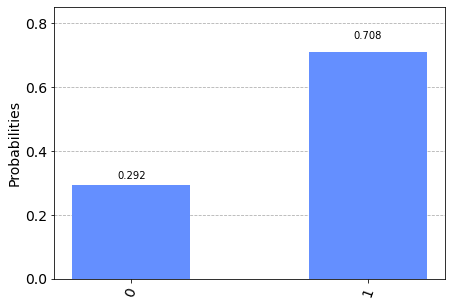

In [144]:
plot_histogram(group_res)